# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import random 
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here


dice=[1,2,3,4,5,6]
def rolling_dice():
    a =random.choices(dice,k=10)
    return a
r_data = rolling_dice()
df= pd.DataFrame(data=r_data, columns=['results'])
df


,results
0,5
1,3
2,3
3,3
4,4
5,4
6,5
7,4
8,4
9,3


#### 2.- Plot the results sorted by value.

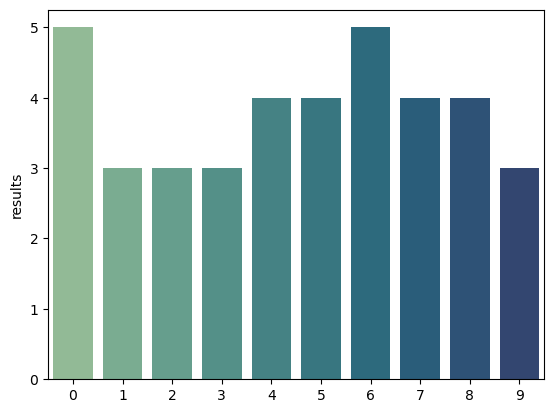

In [3]:
# your code here
df_sorted = df.sort_values(by='results')
sns.barplot(x=df_sorted.index, y='results', data=df_sorted, palette='crest')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

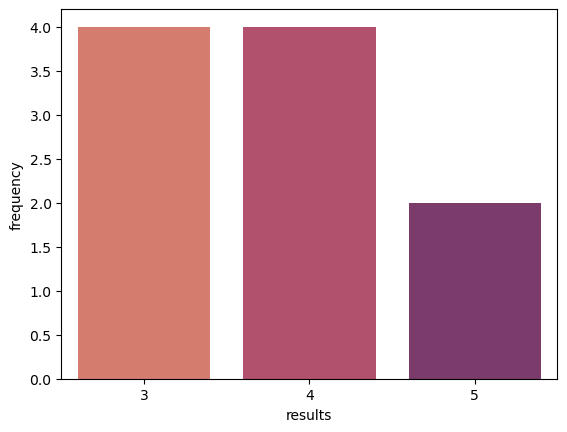

In [4]:
# your code here

df_freq= df['results'].value_counts().sort_index()

sns.barplot(x=df_freq.index, y=df_freq.values, palette='flare')
plt.ylabel('frequency')
plt.show()

In [5]:
"""
On the first plot we can see that we are plotting the value of each roll of the dice.
On the second one instead, we can see that we are counting the number of ocurrences of the rolled dice
"""

'\nOn the first plot we can see that we are plotting the value of each roll of the dice.\nOn the second one instead, we can see that we are counting the number of ocurrences of the rolled dice\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

def rolling_mean():
    mean=sum(df.values)/len(df)
    return mean
mean=rolling_mean()
print(f'mean of the rolled dice: {mean}')

mean of the rolled dice: [3.8]


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
freq_table = pd.crosstab(df['results'], 'freq_results').reset_index()
freq_table.columns= ['results','freq_results']
freq_dist_mean= sum(freq_table['freq_results']*freq_table['results'])/len(freq_table)
print(f'frequency distribution mean: {freq_dist_mean}')

frequency distribution mean: 12.666666666666666


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here

def rolling_median():
    df_sorted=sorted(df.values)
    length=len(df_sorted)
    if length %2 != 0:
        median_index= length//2
        median= df_sorted[median_index]
    
    else:
        median_index_up=length//2
        median_index_down=median_index_up -1
        median= ((df_sorted[median_index_up] + df_sorted[median_index_down])/2)
        
    return median
median=rolling_median()
        
print(f'the median for the rolling dice is: {median}')
    

the median for the rolling dice is: [4.]


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here
q2= median
def quartiles():
    df_sorted = sorted(df)
    length = len(df_sorted)
    q1= df_sorted[:length//2 +1]
    q3= df_sorted[length//2:]
    
    return q1,q3
q1, q3= quartiles()

print(f'25%: {q1}, 50%: {q2}, 75%: {q3}')

25%: ['results'], 50%: [4.], 75%: ['results']


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

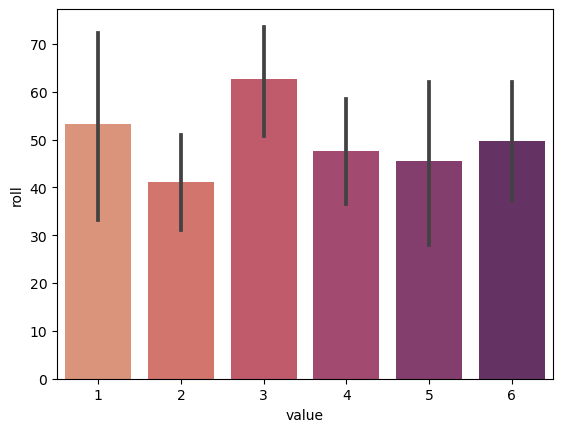

In [18]:
# your code here
dice100 = pd.read_csv('../data/roll_the_dice_hundred.csv')

sorted_dice= dice100.sort_values(by='value')

sns.barplot(x=sorted_dice['value'], y=sorted_dice['roll'], palette='flare')
plt.ylabel('roll')
plt.show()

In [ ]:
"""
It kinda follows a normal distribution.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [21]:
# your code here

def rolling_mean100():
    mean=sum(dice100.values)/len(dice100)
    return mean
mean=rolling_mean100()
print(f'mean of the rolled dice: {mean}')

mean of the rolled dice: [49.5  49.5   3.74]


#### 3.- Now, calculate the frequency distribution.


In [24]:
# your code here
frequency_distribution = {}
for value in dice100['value']:
    if value in frequency_distribution:
        frequency_distribution[value] += 1
    else:
        frequency_distribution[value] = 1
print(frequency_distribution)

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

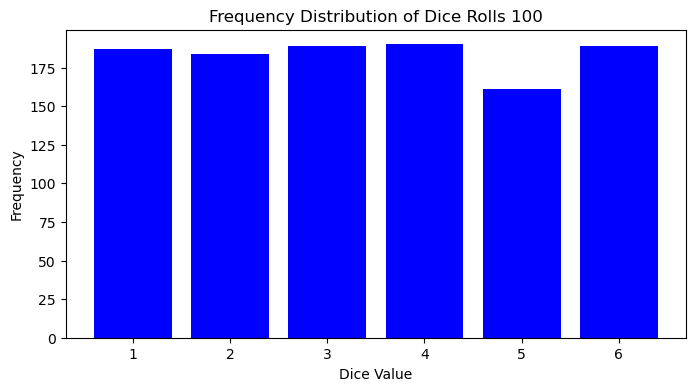

In [31]:
# your code here
plt.figure(figsize=(8, 4))
plt.bar(frequency_distribution.keys(), frequency_distribution.values(), color='b')
plt.title('Frequency Distribution of Dice Rolls 100')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
"""
The mean is 3,74 which is closer to 4, one of the most frequent values.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

{5: 149, 6: 166, 1: 175, 2: 167, 4: 168, 3: 175}


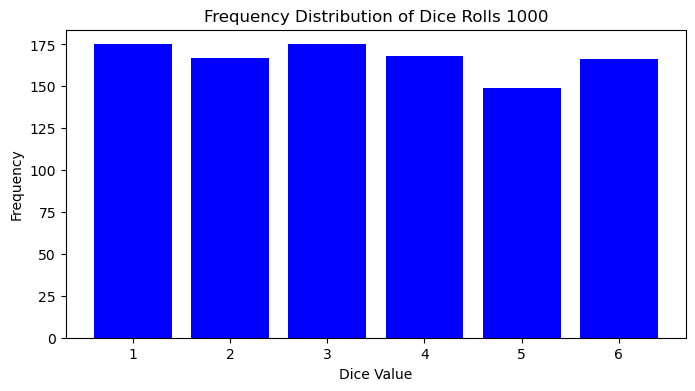

In [35]:
# your code here
dice1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')
frequency_distribution = {}
for value in dice1000['value']:
    if value in frequency_distribution:
        frequency_distribution[value] += 1
    else:
        frequency_distribution[value] = 1
print(frequency_distribution)
plt.figure(figsize=(8, 4))
plt.bar(frequency_distribution.keys(), frequency_distribution.values(), color='b')
plt.title('Frequency Distribution of Dice Rolls 1000')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.show()

In [33]:
def rolling_mean1000():
    mean=sum(dice1000.values)/len(dice1000)
    return mean
mean=rolling_mean1000()
print(f'mean of the rolled dice: {mean}')

mean of the rolled dice: [499.5   499.5     3.447]


In [ ]:
"""
Now the mean is even closer to the most frequent value which is 3, being a normal distribution.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

{68.0: 3, 12.0: 11, 45.0: 29, 38.0: 30, 49.0: 19, 27.0: 25, 39.0: 45, 42.0: 32, 33.0: 22, 30.0: 34, 25.0: 19, 44.0: 23, 53.0: 12, 46.0: 23, 50.0: 16, 22.0: 16, 6.0: 2, 29.0: 26, 35.0: 33, 28.0: 20, 26.0: 23, 60.0: 4, 41.0: 36, 52.0: 14, 32.0: 30, 23.0: 17, 15.0: 8, 40.0: 27, 63.0: 7, 31.0: 24, 34.0: 29, 61.0: 2, 64.0: 2, 37.0: 30, 56.0: 15, 14.0: 10, 13.0: 6, 51.0: 9, 36.0: 31, 18.0: 7, 48.0: 19, 58.0: 7, 20.0: 13, 54.0: 13, 19.0: 11, 62.0: 4, 55.0: 13, 21.0: 14, 43.0: 32, 17.0: 10, 7.0: 1, 47.0: 17, 1.0: 2, 16.0: 8, 24.0: 18, 59.0: 8, 57.0: 7, 8.0: 5, 67.0: 4, 2.0: 2, 66.0: 3, 4.0: 1, 73.0: 1, 82.0: 1, 70.0: 1, 5.0: 2, 71.0: 1, 9.0: 2, 69.0: 1, 11.0: 3, 10.0: 3, 65.0: 2}


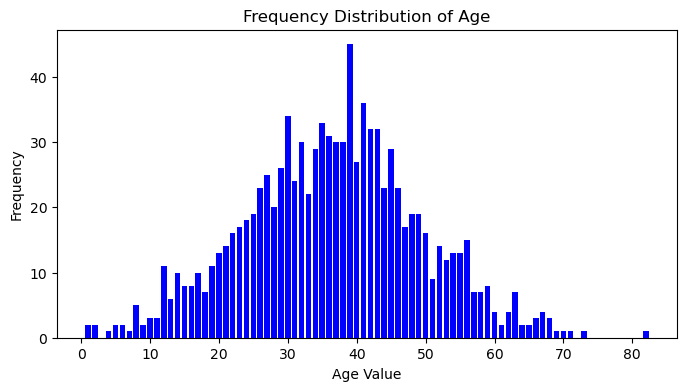

In [36]:
# your code here

population = pd.read_csv('../data/ages_population.csv')
frequency_distribution = {}
for value in population['observation']:
    if value in frequency_distribution:
        frequency_distribution[value] += 1
    else:
        frequency_distribution[value] = 1
print(frequency_distribution)
plt.figure(figsize=(8, 4))
plt.bar(frequency_distribution.keys(), frequency_distribution.values(), color='b')
plt.title('Frequency Distribution of Age')
plt.xlabel('Age Value')
plt.ylabel('Frequency')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here
"""
It follows a normal distribution, the mean should be around 37
"""

In [50]:
pop_mean = population.mean()
pop_std = population.std()

print(f'Mean of population: {pop_mean}')
print(f'Standar Deviation: {pop_std}')

Mean of population: observation    36.56
dtype: float64
Standar Deviation: observation    12.8165
dtype: float64


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

{25.0: 98, 31.0: 61, 29.0: 115, 28.0: 139, 30.0: 90, 24.0: 78, 26.0: 120, 21.0: 17, 27.0: 125, 23.0: 41, 22.0: 35, 32.0: 31, 20.0: 13, 33.0: 22, 19.0: 3, 34.0: 7, 35.0: 3, 36.0: 2}


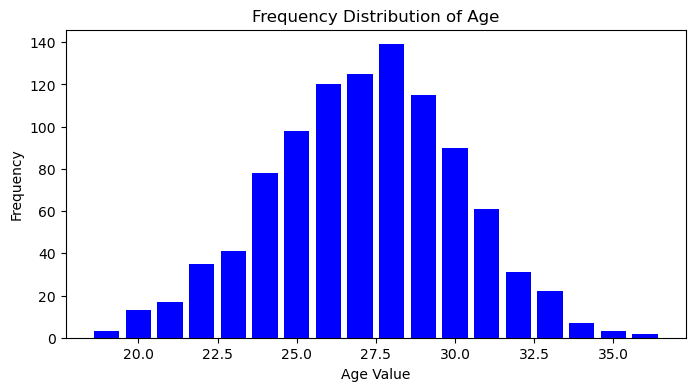

In [43]:
# your code here
population2 = pd.read_csv('../data/ages_population2.csv')

frequency_distribution = {}
for value in population2['observation']:
    if value in frequency_distribution:
        frequency_distribution[value] += 1
    else:
        frequency_distribution[value] = 1
print(frequency_distribution)
plt.figure(figsize=(8, 4))
plt.bar(frequency_distribution.keys(), frequency_distribution.values(), color='b')
plt.title('Frequency Distribution of Age')
plt.xlabel('Age Value')
plt.ylabel('Frequency')
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
It stills follows a normal distribution, but the values has changed (even adding floats)
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [49]:
# your code here
pop_mean2 = population2.mean()
pop_std2 = population2.std()

print(f'Mean of population: {pop_mean2}')
print(f'Standar Deviation: {pop_std2}')

Mean of population: observation    27.155
dtype: float64
Standar Deviation: observation    2.969814
dtype: float64


In [ ]:
"""
Both metrics has changed in 10 digits.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

{21.0: 14, 24.0: 19, 31.0: 21, 54.0: 9, 52.0: 17, 37.0: 31, 69.0: 17, 36.0: 26, 30.0: 24, 64.0: 12, 76.0: 1, 73.0: 6, 42.0: 14, 67.0: 22, 28.0: 18, 50.0: 21, 70.0: 19, 57.0: 8, 20.0: 11, 27.0: 19, 51.0: 14, 56.0: 10, 44.0: 17, 49.0: 18, 65.0: 15, 32.0: 37, 18.0: 9, 45.0: 24, 40.0: 21, 66.0: 19, 72.0: 8, 43.0: 22, 48.0: 25, 35.0: 31, 41.0: 25, 17.0: 10, 23.0: 11, 47.0: 15, 33.0: 17, 15.0: 8, 26.0: 15, 75.0: 2, 29.0: 25, 55.0: 13, 63.0: 12, 39.0: 29, 46.0: 22, 22.0: 11, 71.0: 11, 68.0: 17, 60.0: 6, 34.0: 20, 61.0: 6, 12.0: 4, 38.0: 25, 74.0: 6, 25.0: 17, 53.0: 14, 62.0: 3, 59.0: 8, 19.0: 12, 77.0: 2, 14.0: 5, 16.0: 9, 1.0: 1, 11.0: 2, 13.0: 2, 9.0: 1, 10.0: 2, 2.0: 2, 8.0: 1, 58.0: 6, 4.0: 2, 5.0: 1, 7.0: 1}


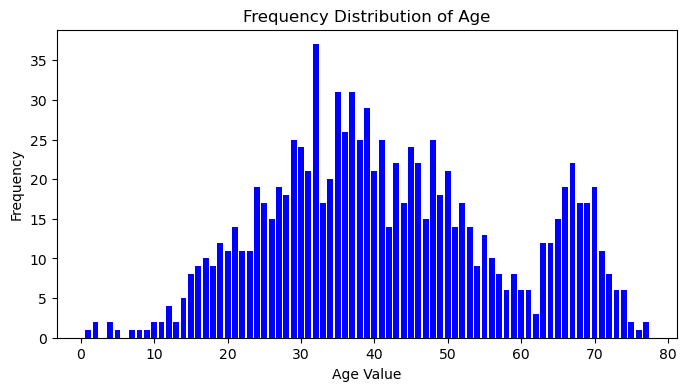

In [46]:
# your code here
population3 = pd.read_csv('../data/ages_population3.csv')
frequency_distribution = {}
for value in population3['observation']:
    if value in frequency_distribution:
        frequency_distribution[value] += 1
    else:
        frequency_distribution[value] = 1
print(frequency_distribution)
plt.figure(figsize=(8, 4))
plt.bar(frequency_distribution.keys(), frequency_distribution.values(), color='b')
plt.title('Frequency Distribution of Age')
plt.xlabel('Age Value')
plt.ylabel('Frequency')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [51]:
# your code here
pop_mean3 = population2.mean()
pop_std3 = population2.std()

print(f'Mean of population: {pop_mean3}')
print(f'Standar Deviation: {pop_std3}')

Mean of population: observation    27.155
dtype: float64
Standar Deviation: observation    2.969814
dtype: float64


In [ ]:
"""
The plots change a lot because the outliers are bigger (there are more values for ages 60 to 80)
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [53]:
# your code here
print(np.percentile(population3,0.25))
print(np.percentile(population3,0.5))
print(np.percentile(population3,0.75))

2.995
4.995
8.4925


In [ ]:
"""
There is much difference beetwen the mean and the median (like 25)
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [54]:
# your code here
print(np.percentile(population3,0.05))
print(np.percentile(population3,0.10))
print(np.percentile(population3,0.95))

1.4995
1.999
10.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""